# EDA and Visualization of a Real-World Dataset TitaniC

In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset 

In [28]:
df=pd.read_csv(r'D:\Six Month Data Science Course with Codenamics\EDA on Titanic Dataset\Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Cleaning 

In [29]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [30]:
df.dropna(inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.shape

(183, 12)

In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [36]:
# Handle outliers in 'Fare' and 'Age'
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age

lower_bound_age = Q1_age - 1.5 * IQR_age
upper_bound_age = Q3_age + 1.5 * IQR_age
df = df[(df['Age'] >= lower_bound_age) & (df['Age'] <= upper_bound_age)]

Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare

lower_bound_fare = Q1_fare - 1.5 * IQR_fare
upper_bound_fare = Q3_fare + 1.5 * IQR_fare
df = df[(df['Fare'] >= lower_bound_fare) & (df['Fare'] <= upper_bound_fare)]

# Visualizations

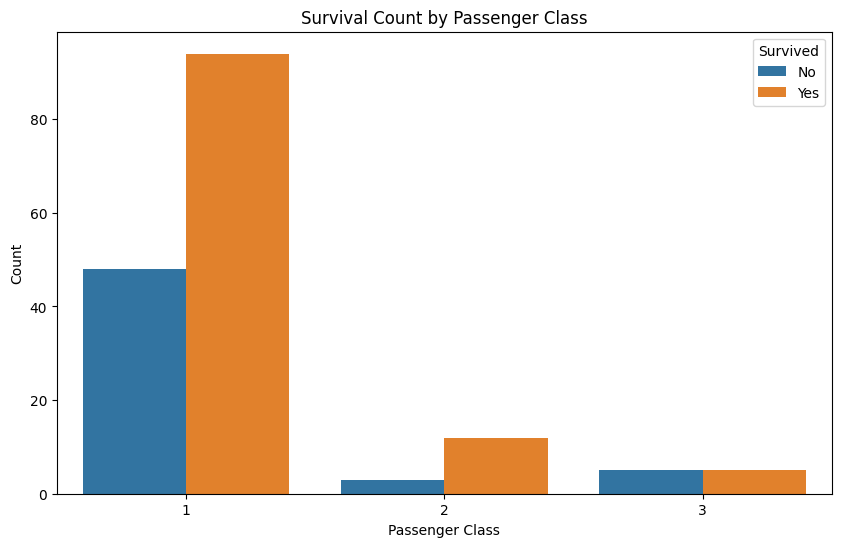

In [37]:
# 1. Bar chart showing survival count based on Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right', labels=['No', 'Yes'])
plt.show()

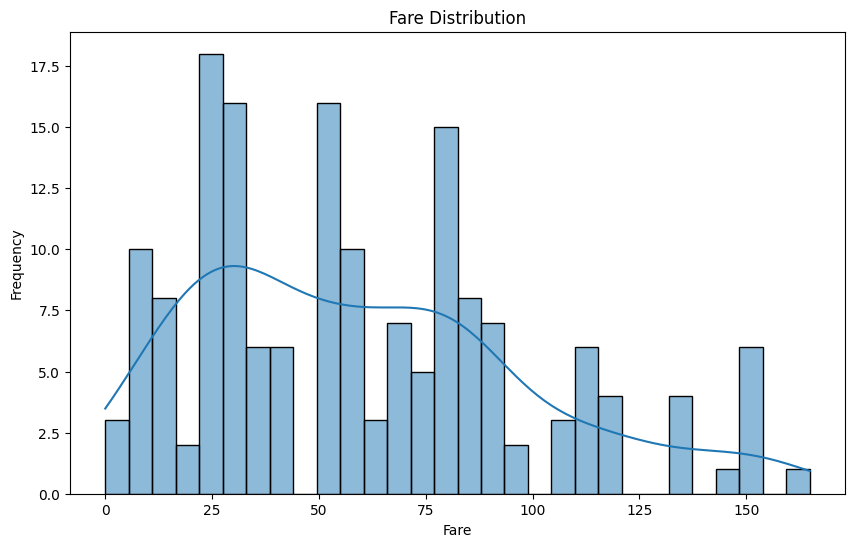

In [40]:
# 2. Histogram of Fare
plt.figure(figsize=(10, 6))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

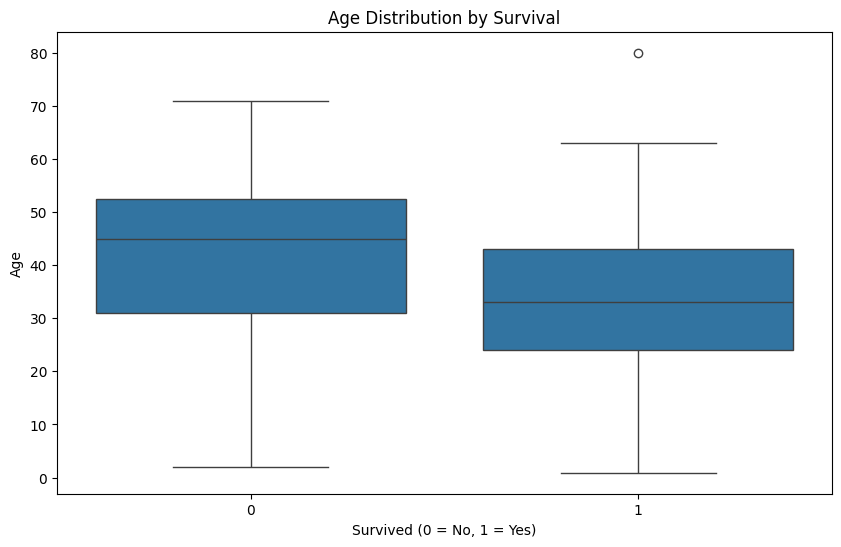

In [41]:
# 3. Box plot comparing Age distributions between survivors and non-survivors
plt.figure(figsize=(10, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

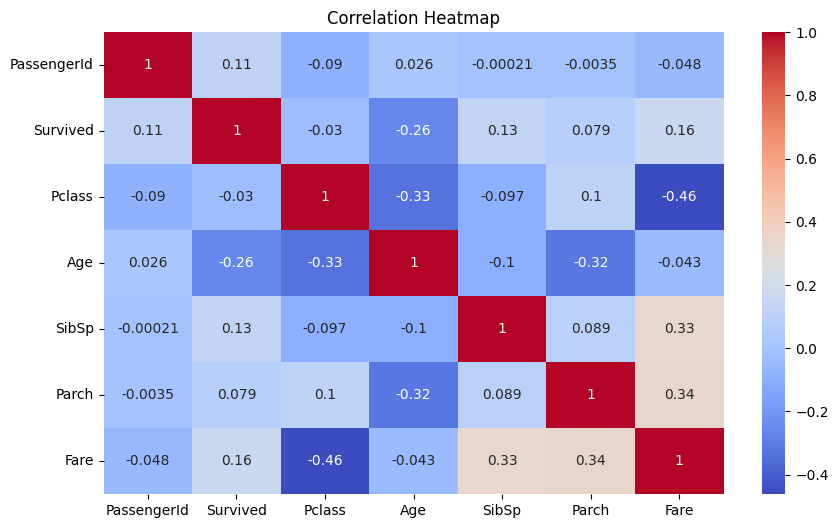

In [ ]:
# Step 4: Correlation heatmap of numeric features
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Insights from EDA on Titanic Dataset

## Survival Rates
- The survival rate for passengers was approximately 38%, indicating that about 62% of passengers did not survive the disaster.
- Survival rates varied significantly by passenger class (Pclass):
  - **First Class (Pclass = 1)** had the highest survival rate, suggesting better access to lifeboats and resources.
  - **Third Class (Pclass = 3)** had the lowest survival rate, indicating that lower-class passengers faced more challenges during the evacuation.

## Age Distribution
- The age distribution of passengers showed that the majority were between 20 and 40 years old, with a noticeable number of children (under 10).
- The box plot comparing age distributions between survivors and non-survivors indicated that younger passengers (particularly children) had higher survival rates compared to older passengers.

## Fare Distribution
- The histogram of fare prices revealed a right-skewed distribution, with a majority of passengers paying relatively low fares.
- A small number of passengers paid significantly higher fares, which could correlate with higher survival rates, particularly in the first class.

## Correlation Between Features
- The correlation heatmap indicated several relationships:
  - **Pclass** was negatively correlated with survival (1st class passengers had a higher survival rate).
  - **Fare** was positively correlated with survival, suggesting that passengers who paid more for their tickets had a better chance of survival.
  - **Age** showed a negative correlation with survival, indicating that older passengers were less likely to survive.

## Data Cleaning Observations
- The dataset contained missing values, particularly in the `Age` and `Cabin` columns.
- Missing values in `Age` were imputed with the drop command, while rows with missing `Embarked` values were filled with the drop command.
- There were no duplicate entries in the dataset after cleaning.

## Outlier Management
- Outliers were identified in both `Fare` and `Age` using the Interquartile Range (IQR) method and were filtered out to ensure a more accurate analysis of the data.

# Conclusion

The EDA of the Titanic dataset reveals several key insights into the factors influencing passenger survival during the disaster:

## Survival Rates
- Approximately 38% of passengers survived, with significant disparities based on passenger class. First-class passengers had a much higher survival rate compared to those in third class, highlighting the influence of socio-economic status on survival outcomes.

## Age Distribution
- Most passengers were between 20 and 40 years old, with children showing higher survival rates. This suggests that age played a crucial role, with younger individuals more likely to survive.

## Fare Distribution
- The fare distribution was right-skewed, indicating that while most passengers paid low fares, a few paid significantly higher amounts. This correlates with survival rates, as higher fares (often associated with first-class tickets) were linked to better survival outcomes.

## Correlations
- The analysis showed strong correlations between various features:
  - **Pclass** and survival were negatively correlated, indicating that higher-class passengers had better survival rates.
  - **Fare** had a positive correlation with survival, suggesting that spending more on tickets increased chances of survival.
  - **Age** had a negative correlation with survival, indicating older passengers were less likely to survive.

## Data Cleaning
- The dataset contained missing values, particularly in the Age and Cabin columns, which were addressed through appropriate imputation and removal methods.

## Outlier Management
- Outliers in Fare and Age were effectively managed using the IQR method, ensuring the reliability of statistical analyses.

# Recommendations

Based on these insights, the following recommendations can be made:

## Targeted Marketing Strategies
- Given the significant impact of socio-economic status on survival, consider tailoring marketing strategies to appeal to different classes of passengers, emphasizing the value of first-class tickets.

## Safety Protocols
- Implement enhanced safety protocols and communication for all passengers, particularly emphasizing the importance of evacuating quickly and efficiently, especially for vulnerable groups like children and the elderly.